In [ ]:
import matplotlib.pyplot as plt
import mikeio

In [ ]:
ds = mikeio.read("../tests/testdata/vu_tide_hourly.dfs1")
ds = ds.rename({"Tidal current component (geographic East)":"Tidal current u-comp"})
da = ds["Tidal current u-comp"]
da

<mikeio.DataArray>
name: Tidal current u-comp
dims: (time:721, x:11)
time: 2021-08-01 00:00:00 - 2021-08-31 00:00:00 (721 records)
geometry: Grid1D (n=11, dx=0.09818)

In [ ]:
da.geometry

<mikeio.Grid1D>
x: [0, 0.09818, ..., 0.9818] (nx=11, dx=0.09818)

In [ ]:
da[0:10:2].plot();

In [ ]:
da[0:10:2].plot.line()
plt.legend(da.time[0:10:2]);

In [ ]:
# plot all points on line as time series
da.plot.timeseries();

In [ ]:
# first 48 hours...  
da[:49].plot.pcolormesh();

In [ ]:
# single point on line as timeseries
da.sel(x=0.5).sel(time=slice("2021-08-01","2021-08-03")).plot();

In [ ]:
# all data as histogram
da.plot.hist(bins=40);

In [ ]:
da_1 = mikeio.read('../tests/testdata/gebco_sound.dfs2')[0]
da_1

<mikeio.DataArray>
name: Elevation
dims: (time:1, y:264, x:216)
time: 2020-05-15 11:04:52 (time-invariant)
geometry: Grid2D (ny=264, nx=216)

In [ ]:
da_1.geometry

<mikeio.Grid2D>
x: [12.2, 12.21, ..., 13.1] (nx=216, dx=0.004167)
y: [55.2, 55.21, ..., 56.3] (ny=264, dy=0.004167)
projection: LONG/LAT

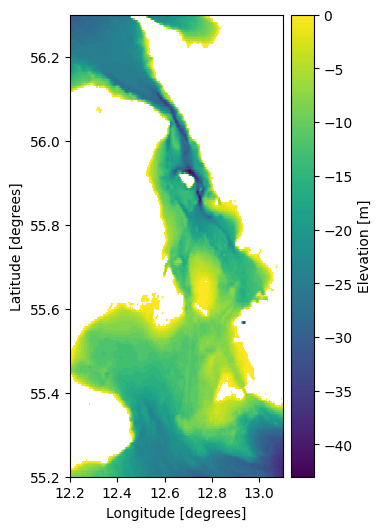

In [ ]:
da_1.plot(figsize=(10, 6))

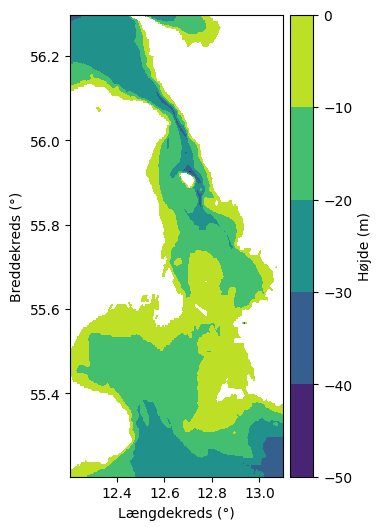

In [ ]:
da_1.plot.contourf(figsize=(10, 6), levels=4, label='Højde (m)')
plt.xlabel('Længdekreds (°)')
plt.ylabel('Breddekreds (°)')

In [ ]:
_ax = da_1.plot.contour(figsize=(8, 8), cmap='plasma')
_ax.set_xlim([12.5, 12.9])
_ax.set_ylim([55.8, 56])

In [ ]:
da_1.plot.hist(bins=20)

In [ ]:
fn = "../tests/testdata/test_dfs3.dfs3"
dfs = mikeio.open(fn)
dfs

<mikeio.Dfs3>
geometry: Grid3D(nz=34, ny=17, nx=21)
items:
 0: Temperature <Temperature> (degree Kelvin)
time: 2 steps
start time: 2020-12-30 00:00:00

In [ ]:
dfs.geometry

<mikeio.Grid3D>
x: [10, 10.25, ..., 15] (nx=21, dx=0.25)
y: [54, 54.25, ..., 58] (ny=17, dy=0.25)
z: [0, 1, ..., 33] (nz=34, dz=1)
origin: (10, 54), orientation: 0.000
projection: LONG/LAT

In [ ]:
ds_1 = dfs.read()
ds_1

<mikeio.Dataset>
dims: (time:2, z:34, y:17, x:21)
time: 2020-12-30 00:00:00 - 2020-12-30 01:00:00 (2 records)
geometry: Grid3D(nz=34, ny=17, nx=21)
items:
 0: Temperature <Temperature> (degree Kelvin)

In [ ]:
ds_1.Temperature.plot()

In [ ]:
_ax = ds_1.Temperature[:, 0, :, :].plot.contourf()
_ax.grid()

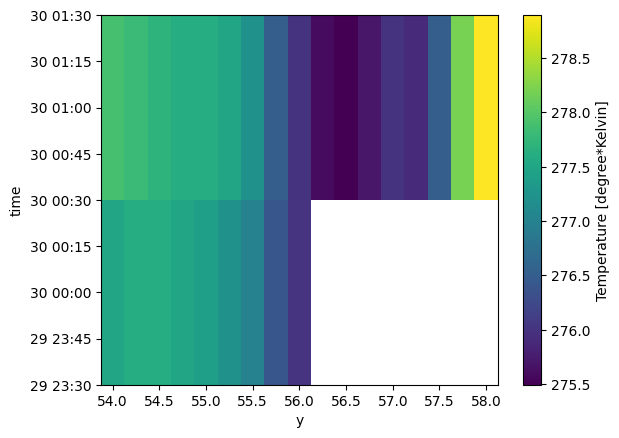

In [ ]:
ds_1.Temperature[:, 0, :, 0].plot()

In [ ]:
ds_2 = dfs.read(layers=0)
ds_2

<mikeio.Dataset>
dims: (time:2, y:17, x:21)
time: 2020-12-30 00:00:00 - 2020-12-30 01:00:00 (2 records)
geometry: Grid2D (ny=17, nx=21)
items:
 0: Temperature <Temperature> (degree Kelvin)

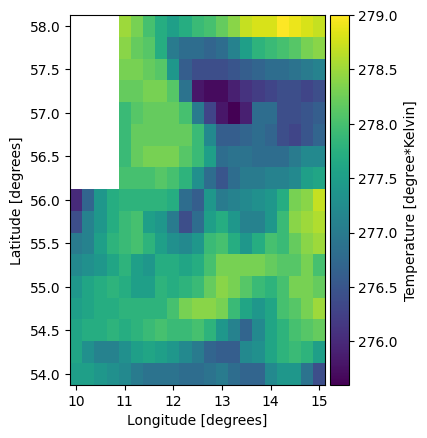

In [ ]:
ds_2.Temperature.plot()

In [ ]:
import marimo as mo

# DataArray - Dfs123 plotting

A DataArray with gridded data, can be plotted in many different ways.

## Dfs1

## Dfs2

It is also possible to customize the labels of the axes as well as the color bar, e.g. for localized adaption.

## Dfs3